## Plotnine-prism Stacked Bar Chart

Stacked Bar Chart with Prism Theme Syling.

Plotnine Stacked Bar Chart from [here](https://plotnine.org/gallery/stage.html).

Then converted to Plotnine-prism theme styling by much the same way as ['REAMDE' notebook from the plotnine-prism repo](https://nbviewer.org/github/pwwang/plotnine-prism/blob/master/examples/README.ipynb).

In [1]:
%%capture
!curl -OL https://raw.githubusercontent.com/pwwang/plotnine-prism/refs/heads/master/examples/nb_helpers.py
from plotnine import *
from plotnine_prism import *

%run nb_helpers.py

In [2]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    after_stat,
    stage,
    geom_bar,
    geom_text,
    geom_bin_2d,
    stat_bin_2d,
)
df = pd.DataFrame({
    "var1": list("abbcccddddeeeee"),
    "cat": list("RSRSRSRRRSRSSRS")
})

(
    ggplot(df, aes("var1"))
    + geom_bar()
)
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
    )
)
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
        position="stack",
    )
)

Base ggplot2-like styling: 

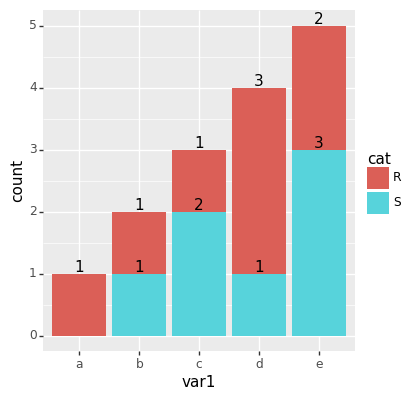

 Plotnine-prism theme styling: 

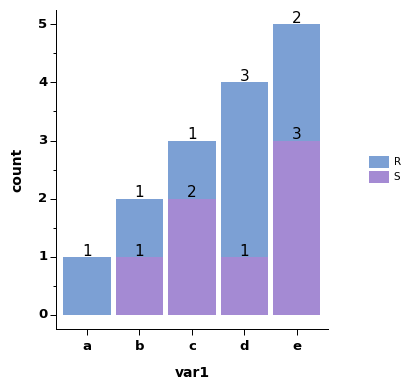

In [3]:
# Stacked Bar Chart: Base ggplot2-like vs. Plotnine-prism

p1 = base
p2 = (
    base + 
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    theme_prism() 
)
print('Base ggplot2-like styling:',p1,'Plotnine-prism theme styling:', p2)

Adjusting things further to get a result more like style I see in example from Prism Viewer:

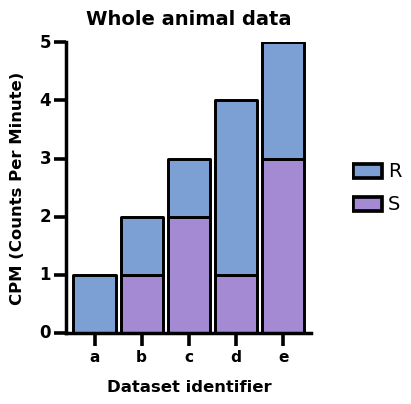

<Figure Size: (400 x 400)>

In [4]:
# Keep your original base plot with original data
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar(color='black', size=1.2)
)

p3 = (
    base + 
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    theme_prism() +
    theme(
        # Thick axis lines
        axis_line_x=element_line(size=2.5, color='black'),
        axis_line_y=element_line(size=2.5, color='black'),
        # Major ticks, no minor ticks
        axis_ticks_x=element_line(size=2.6, color='black'),
        axis_ticks_y=element_line(size=2.6, color='black'),
        axis_ticks_length=9,
        # Remove minor ticks
        axis_ticks_minor=element_blank(),
        axis_ticks_minor_x=element_blank(),
        axis_ticks_minor_y=element_blank(),
        # Larger y-axis tick label text
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=11.1),
        # Larger axis titles
        axis_title_x=element_text(size=11.85),
        axis_title_y=element_text(size=11.85),
        # Larger Plot title
        plot_title=element_text(size=14),
        # -----------------------#
        # Rectangular legend boxes
        legend_key_width=23,
        legend_key_height=13,
        legend_entry_spacing=10, # for increasing spacing between legend items
        legend_text=element_text(size=14),
        legend_key=element_blank(),
        # -----------------------#
        # Remove panel border
        panel_border=element_blank(),
        axis_line=element_blank()
    ) +
    # Try adding the legend border through guides instead
    guides(fill=guide_legend(override_aes=dict(color='black', size=1.5))) +
    scale_y_continuous(limits=[0, df['var1'].value_counts().max()], expand=(0, 0, 0, 0)  ) +
    labs(
        title="Whole animal data",
        x="Dataset identifier", 
        y="CPM (Counts Per Minute)"
    )
)
p3

And an example if identifiers were longer and you needed to rotate them:

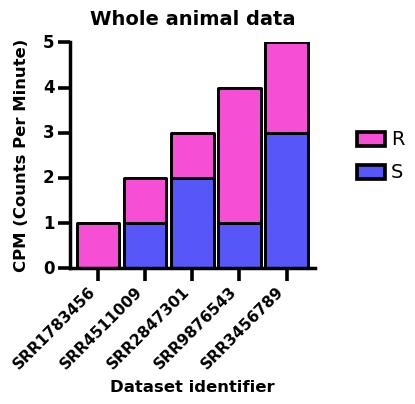

<Figure Size: (400 x 400)>

In [5]:
# Keep your original base plot with original data
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar(color='black', size=1.2)
)
from plotnine_prism import prism_fill_pal
# Get specific colors from the palette
palette_func = prism_fill_pal('winter_soft')
colors = palette_func(10)  # Get 10 colors from the palette
#print(colors)
selected_colors = colors[1:7] 
p3 = (
    base + 
    scale_color_manual(values=selected_colors) +
    scale_fill_manual(values=selected_colors) +
    scale_x_discrete(labels=["SRR1783456", "SRR4511009", "SRR2847301", "SRR9876543", "SRR3456789"]) +
    theme_prism() +
    theme(
        # Thick axis lines
        axis_line_x=element_line(size=2.5, color='black'),
        axis_line_y=element_line(size=2.5, color='black'),
        # Major ticks, no minor ticks
        axis_ticks_x=element_line(size=2.6, color='black'),
        axis_ticks_y=element_line(size=2.6, color='black'),
        axis_ticks_length=9,
        # Remove minor ticks
        axis_ticks_minor=element_blank(),
        axis_ticks_minor_x=element_blank(),
        axis_ticks_minor_y=element_blank(),
        # Larger y-axis tick label text
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=11.1, angle=45, hjust=1, vjust=1, margin={'t': 1.8}),
        # Larger axis titles
        axis_title_x=element_text(size=11.85),
        axis_title_y=element_text(size=11.85),
        # Larger Plot title
        plot_title=element_text(size=14),
        # -----------------------#
        # Rectangular legend boxes
        legend_key_width=23,
        legend_key_height=13,
        legend_entry_spacing=10, # for increasing spacing between legend items
        legend_text=element_text(size=14),
        legend_key=element_blank(),
        # -----------------------#
        # Remove panel border
        panel_border=element_blank(),
        axis_line=element_blank()
    ) +
    # Try adding the legend border through guides instead
    guides(fill=guide_legend(override_aes=dict(color='black', size=1.5))) +
    scale_y_continuous(limits=[0, df['var1'].value_counts().max()], expand=(0, 0, 0, 0)  ) +
    labs(
        title="Whole animal data",
        x="Dataset identifier", 
        y="CPM (Counts Per Minute)"
    )
)
p3

--------

## Pure Matplotlib version

I was finding that code a little difficult to work with the typical dataframe I had. So I made a matplotlib version that allowed more flexibility:

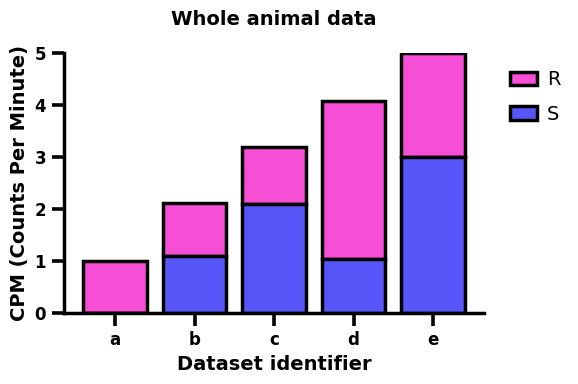

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

# Dataframe
s = '''
identifier,R,S
a,1.0,0
b,1.0,1.11
c,1.1,2.1
d,3.03,1.05
e,2.0,3.0
'''
df_typical = pd.read_csv(io.StringIO(s))

# Create single clean plot - more compact size
plt.figure(figsize=(6, 4))
ax = plt.gca()

x_pos = np.arange(len(df_typical))
#colors = ['#5B9BD5', '#B19CD9']  # Light blue and light purple
colors = ['#55A0FB', '#F74ED6', '#5757F9', '#C8DEF9', '#DE8BF9', '#05BE78', '#90BFF9', '#F7ABE8', '#8D8DFF'] # from Plotnine-prism 'winter_soft'
colors = colors[1:3]

# Stacked bars with thick black borders - S on bottom, R on top
'''
bars2 = plt.bar(x_pos, df_typical['R'], bottom=df_typical['S'], label='R', 
                color=colors[0], alpha=0.8, edgecolor='black', linewidth=2.5)
bars1 = plt.bar(x_pos, df_typical['S'], label='S',
                color=colors[1], alpha=0.8, edgecolor='black', linewidth=2.5)
'''
bars2 = plt.bar(x_pos, df_typical['R'], bottom=df_typical['S'], label='R', 
                color=colors[0],  edgecolor='black', linewidth=2.5)
bars1 = plt.bar(x_pos, df_typical['S'], label='S',
                color=colors[1], edgecolor='black', linewidth=2.5)

# Prism styling - bold labels
plt.xlabel('Dataset identifier', fontsize=14, fontweight='bold')
plt.ylabel('CPM (Counts Per Minute)', fontsize=14, fontweight='bold')
plt.title('Whole animal data', fontsize=14, fontweight='bold', pad=20)

plt.xticks(x_pos, df_typical['identifier'], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Thick axis lines
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Thick ticks
ax.tick_params(axis='both', which='major', width=2.6, length=9)
ax.tick_params(axis='both', which='minor', width=0, length=0)

# Y-axis limits
y_max = (df_typical['R'] + df_typical['S']).max()
plt.ylim(0, y_max)

# Legend
legend = plt.legend(fontsize=14, frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left',
                   handlelength=1.40, handletextpad=0.5, labelspacing=0.8, markerscale=815.3) # `handletextpad` moves the label to the right of the rectangle more; `labelspacing` adjusts the spacing between the legned rectangles
# Make legend text darker but not quite bold
for text in legend.get_texts():
    text.set_fontweight('medium')

plt.tight_layout()
plt.subplots_adjust(right=0.82)  # Make room for the legend
plt.grid(False)
plt.show()

----
Enjoy!